In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import random

In [2]:
train=pd.read_csv('d:/sklearn/train1.csv')
test=pd.read_csv('d:/sklearn/test1.csv')

In [3]:
train['winPlacePerc']=train['winPlacePerc'].fillna(train['winPlacePerc'].median())

In [4]:
train.isnull().sum().sum()

0

In [5]:
train['groupId'].value_counts()


14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
a3bc33847d2304    31
6cf057e17002ff    28
e8d2b3018f9d69    28
cc0f7324bf3b34    27
566ed94d7d1fd2    27
ce8c1468dafa0a    26
eda174acfb503b    26
59b747efaf412d    26
6a292d4d1a0207    26
3f20b49669a981    26
872e2b63dedcd9    25
475538899822a6    25
be589a52d14364    24
af8923aa727499    24
72145e7a9939f5    24
ff4ba5c55012ff    23
338d6ab3bf5f19    23
3b88c850a9719c    23
5ca2b0bc03d8ea    23
81a9cb7d53f761    23
eaa6e72633dd45    23
2eab78352cf7fc    23
5f47cf67f824e0    22
1146732e6a3ea9    22
82f4d187747dd8    22
                  ..
a528fa54200b56     1
aa50d40bc64a73     1
de0515c1aac0ad     1
f613ec2f8957d7     1
857e067e60d714     1
5d1571371f0aad     1
83bfcb8db6524b     1
231c2a2348224f     1
92eb8a3b6a9e8a     1
e29a0a89964d5f     1
35f8484b3d533a     1
09a574672339e6     1
fee71d331dad5a     1
e51f7c475353df     1
062765fef419e7     1
c74e5557373bfb     1
e92eb9c0551ee

In [6]:
train['matchId'].value_counts()

ee6dea676602e7    100
e2018722649ff3    100
dedd9bdc503d3d    100
e6748516cefaeb    100
98618d134ebcec    100
91e284e0b6c102    100
0c7035425ac6d9    100
7abdaaa25b5f68    100
89f4c0227ba9b2    100
f035acf4a49fdd    100
0940fff574aefa    100
717cc1a08d7012    100
1b888a1dbe06a5    100
21f34ed30102cd    100
9e055b4d29700e    100
70c3de6dae6d1b    100
a65b47dd1769ca    100
90e77af4f99a9e    100
e25c997d698c52    100
2722649cfcf904    100
f56ebaf2e99141    100
9da197166ac521    100
b9a2fcd081b174    100
7a02900b27bab4    100
7e4404c758e659    100
5ecec930c763bf    100
f8f9b7bd47ed2e    100
6e53b51f6df50b    100
5741cf9d2a82c4    100
7558202af18e94    100
                 ... 
8b696c934c5cfc      8
8772c5274a0630      8
37989d2861a855      8
e263f4a227313a      8
cf214bd1cc1dda      8
9b5eba3473e5f0      8
c1217e571d7932      8
378847703cc63b      8
29616490381297      8
e3c824e12ff949      8
71af975b5e9a8a      8
b854116387dfbd      8
17536f834bb256      7
23c3819550f61f      7
bc10cc08f1

In [7]:
#考虑一种情况：有可能菜鸟加入了好的团队中而影响了分数，查询下组别与最终分数的关系
df=pd.DataFrame()
df[['groupId','matchId','winPlacePerc']]=pd.DataFrame(train[['groupId','matchId','winPlacePerc']].copy())
df['groupId']=df['groupId'].astype('category').cat.codes
df['matchId']=df['matchId'].astype('category').cat.codes
df['winPlacePerc']=df['winPlacePerc'].astype('category').cat.codes

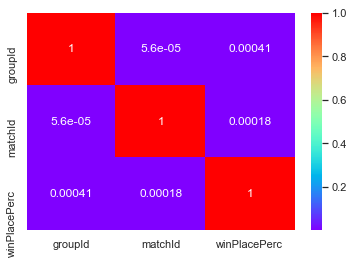

In [8]:
sns.heatmap(df.corr(),cmap='rainbow',annot=True)
#所以没什么相关性

In [9]:
#删除 id groupid matchid列
train=train.drop(train[['Id','groupId','matchId']],axis=1)


In [10]:
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [11]:
train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


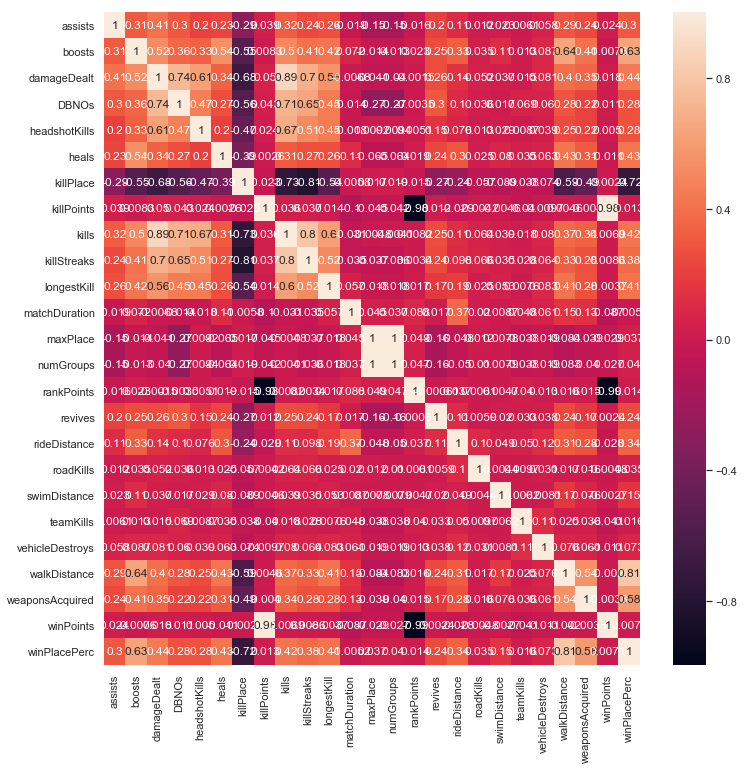

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True)

In [45]:
df=train.corr()
df['winPlacePerc'].sort_values(ascending=False)[:20]

winPlacePerc       1.000000
walkDistance       0.810887
boosts             0.634234
weaponsAcquired    0.583806
damageDealt        0.440507
heals              0.427857
kills              0.419916
longestKill        0.410154
killStreaks        0.377566
rideDistance       0.342915
assists            0.299441
DBNOs              0.279970
headshotKills      0.277722
revives            0.240881
swimDistance       0.149607
vehicleDestroys    0.073436
numGroups          0.039621
maxPlace           0.037377
roadKills          0.034544
teamKills          0.015943
Name: winPlacePerc, dtype: float64

In [14]:
#对winplaceperc进行分类：where嵌套方法
train['WinPlaceBucket'] = np.where(train.winPlacePerc >0.75, 'Q1',np.where(train.winPlacePerc>.5, 'Q2', 
                                   np.where(train.winPlacePerc>.25, 'Q3','Q4')))
train[['winPlacePerc','WinPlaceBucket']].head()

,winPlacePerc,WinPlaceBucket
0,0.4444,Q3
1,0.6400,Q2
2,0.7755,Q1
3,0.1667,Q4
4,0.1875,Q4


No handles with labels found to put in legend.


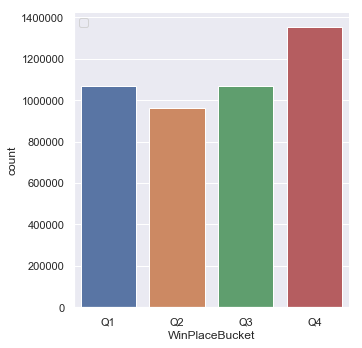

In [15]:
sns.catplot(x='WinPlaceBucket', kind='count', data=train.sort_values('WinPlaceBucket'))
plt.legend()

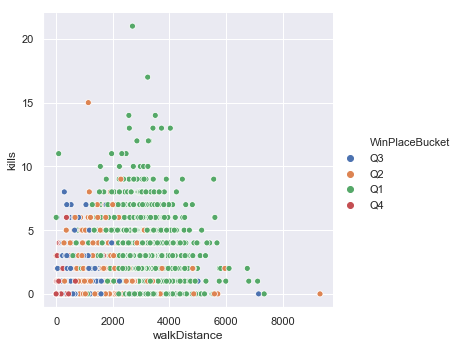

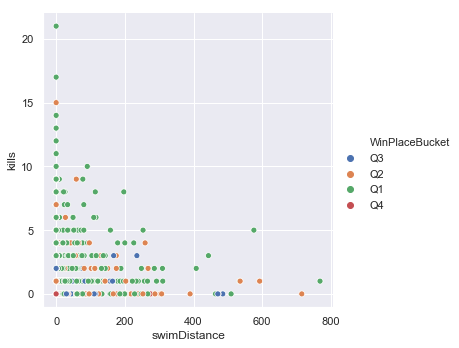

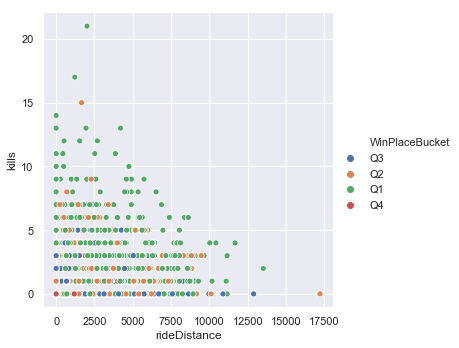

In [16]:
#看一下walkDistance，swimDistance，rideDistance与kills的关系 为了内存取1000
sns.relplot(x='walkDistance', y='kills', hue='WinPlaceBucket', data=train[:10000])
sns.relplot(x='swimDistance', y='kills', hue='WinPlaceBucket', data=train[:10000])
sns.relplot(x='rideDistance', y='kills', hue='WinPlaceBucket', data=train[:10000])

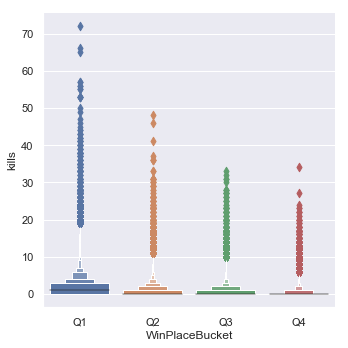

In [17]:
#kills与winplaceprec的关系
sns.catplot(x='WinPlaceBucket', y='kills', kind='boxen',data=train.sort_values("WinPlaceBucket"))

In [18]:
#讨论kills 将kills进行分组 0，1，2，3-5，6-10，10+
train['KillsBucket'] = np.where(train.kills >10, 'Kills:10+', 
                          np.where(train.kills>5, 'Kills:6 to 10', 
                                   np.where(train.kills>=3, 'Kills:3 to 5', 
                                            np.where(train.kills==2, 'Kills:2', 
                                                     np.where(train.kills==1, 'Kill:1', 'Kill:0')))))
train[['winPlacePerc','WinPlaceBucket','KillsBucket']].head()

,winPlacePerc,WinPlaceBucket,KillsBucket
0,0.4444,Q3,Kill:0
1,0.6400,Q2,Kill:0
2,0.7755,Q1,Kill:0
3,0.1667,Q4,Kill:0
4,0.1875,Q4,Kill:1


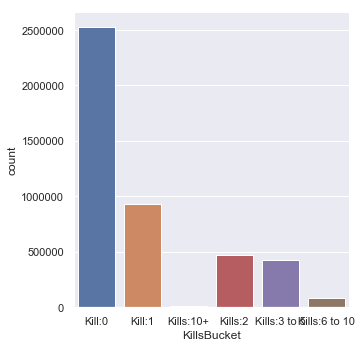

In [19]:
sns.catplot(x='KillsBucket', kind='count', data=train.sort_values('KillsBucket'))


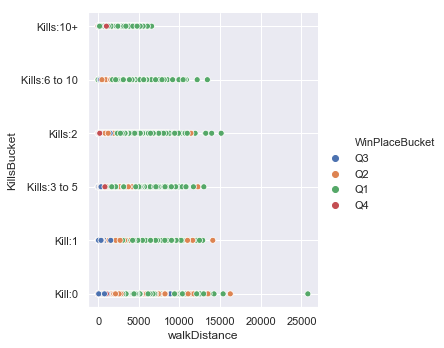

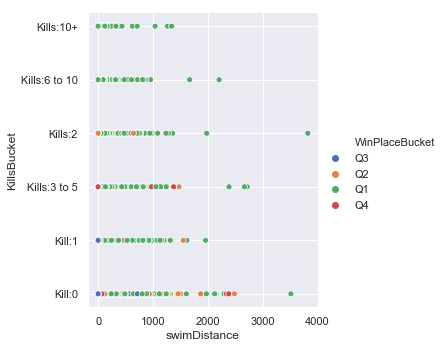

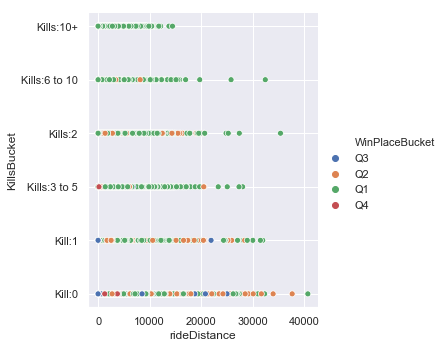

In [20]:
sns.relplot(x='walkDistance', y='KillsBucket', hue='WinPlaceBucket', data=train)
sns.relplot(x='swimDistance', y='KillsBucket', hue='WinPlaceBucket', data=train)
sns.relplot(x='rideDistance', y='KillsBucket', hue='WinPlaceBucket', data=train)

No handles with labels found to put in legend.


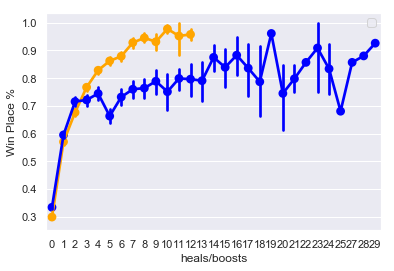

In [25]:
#boosts and heals 为了内存取前10000
sns.pointplot(x='boosts', y='winPlacePerc', data=train[:10000],color='orange')
sns.pointplot(x='heals', y='winPlacePerc', data=train[:10000], color='blue')
plt.xlabel('heals/boosts')
plt.ylabel("Win Place %")
plt.legend()

In [53]:
#多次实践发现取前10分数比较高
ntrain=train[['walkDistance','boosts','weaponsAcquired','damageDealt','heals','kills'
              ,'longestKill','killStreaks' ,'rideDistance']].values
label=train['winPlacePerc'].values
ntest=test[['walkDistance','boosts','weaponsAcquired','damageDealt','heals','kills'
              ,'longestKill','killStreaks' ,'rideDistance']].values

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()



Text(0.5,1,'average score0.7131373614112781')

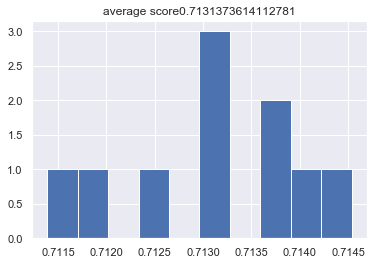

In [55]:
scores=cross_val_score(lr,ntrain,label,cv=10)
plt.hist(scores)
plt.title('average score{}'.format(np.mean(scores)))

In [60]:
lr.fit(ntrain,label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
lr.score(ntrain,label)

0.7131441037407615

In [62]:
ypre=lr.predict(ntest)
ypre

array([0.27793131, 0.8074755 , 0.37645863, ..., 0.76643268, 0.63804717,
       0.17623791])

In [63]:
final=test[['walkDistance','boosts','weaponsAcquired','damageDealt','heals','kills'
              ,'longestKill','killStreaks' ,'rideDistance']]
final.head()

,walkDistance,boosts,weaponsAcquired,damageDealt,heals,kills,longestKill,killStreaks,rideDistance
0,588.0,0,1,51.46,0,0,0.00,0,0.0
1,2017.0,4,6,179.10,2,2,361.90,1,4669.0
2,787.8,0,4,23.40,4,0,0.00,0,0.0
3,1812.0,0,3,65.52,0,0,0.00,0,0.0
4,2963.0,4,4,330.20,1,3,60.06,1,0.0


In [64]:
final['winPlacePerc']=pd.DataFrame(ypre)
final.head()

D:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,walkDistance,boosts,weaponsAcquired,damageDealt,heals,kills,longestKill,killStreaks,rideDistance,winPlacePerc
0,588.0,0,1,51.46,0,0,0.00,0,0.0,0.277931
1,2017.0,4,6,179.10,2,2,361.90,1,4669.0,0.807476
2,787.8,0,4,23.40,4,0,0.00,0,0.0,0.376459
3,1812.0,0,3,65.52,0,0,0.00,0,0.0,0.506060
4,2963.0,4,4,330.20,1,3,60.06,1,0.0,0.830945
